<a href="https://colab.research.google.com/github/RatchanonMo/curriculum/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [2]:
# สำหรับคนที่ยังไม่ได้ลงไลบรารี่ fastbook ให้ uncomment บรรทัด !pip install
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 7.7 MB/s 
     |████████████████████████████████| 346 kB 64.4 MB/s 
     |████████████████████████████████| 1.2 MB 56.5 MB/s 
     |████████████████████████████████| 197 kB 66.7 MB/s 
     |████████████████████████████████| 4.2 MB 53.4 MB/s 
     |████████████████████████████████| 60 kB 8.8 MB/s 
     |████████████████████████████████| 212 kB 55.1 MB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 1.1 MB 56.0 MB/s 
     |████████████████████████████████| 140 kB 77.0 MB/s 
     |████████████████████████████████| 596 kB 72.1 MB/s 
     |████████████████████████████████| 127 kB 73.3 MB/s 
     |████████████████████████████████| 144 kB 20.4 MB/s 
     |████████████████████████████████| 271 kB 76.0 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 112 kB 76.1 MB/s 
     |█████████████████

In [3]:
from fastbook import *
import warnings
warnings.filterwarnings('ignore')

In [4]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [6]:
dls = fields.dataloaders("/content/gdrive/MyDrive/dataset/data_split")

In [7]:
dls.vocab

['Black_rot', 'Downy_mildew', 'Healthy_leaf', 'Powdery_mildew', 'Rust_leaf', 'Sooty_mold', 'Tar_spot']

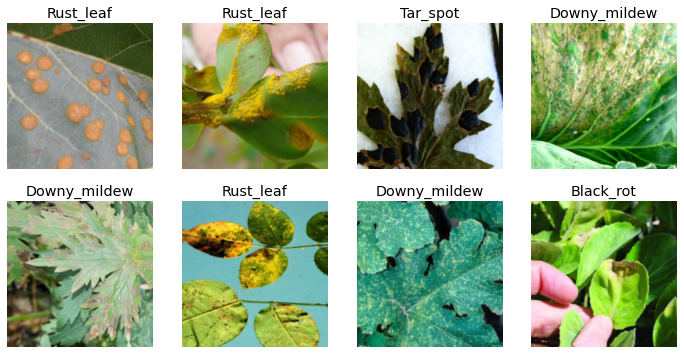

In [8]:
dls.train.show_batch(max_n=8, nrows=2)

In [27]:
learner = vision_learner(dls, models.vgg16_bn, metrics=[error_rate, accuracy], opt_func=Adam)

SuggestedLRs(valley=0.0010000000474974513)

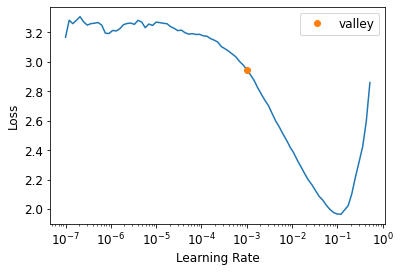

In [10]:
learner.lr_find() # หา learning rate ที่เหมาะสม

In [11]:
lr = learner.lr
lr

0.001

In [28]:
learner.fine_tune(epochs=250, freeze_epochs=1, base_lr=lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.995977,1.870382,0.723404,0.276596,00:18


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.226005,1.755762,0.652482,0.347518,00:19
1,2.236089,1.617995,0.588652,0.411348,00:21
2,2.158207,1.502541,0.531915,0.468085,00:19
3,2.013170,1.399926,0.489362,0.510638,00:19
4,1.900348,1.309465,0.468085,0.531915,00:19
5,1.806025,1.255732,0.446809,0.553191,00:19
6,1.694430,1.209326,0.432624,0.567376,00:19
7,1.629452,1.173092,0.390071,0.609929,00:19
8,1.529721,1.137124,0.390071,0.609929,00:19
9,1.416733,1.103831,0.375887,0.624114,00:19


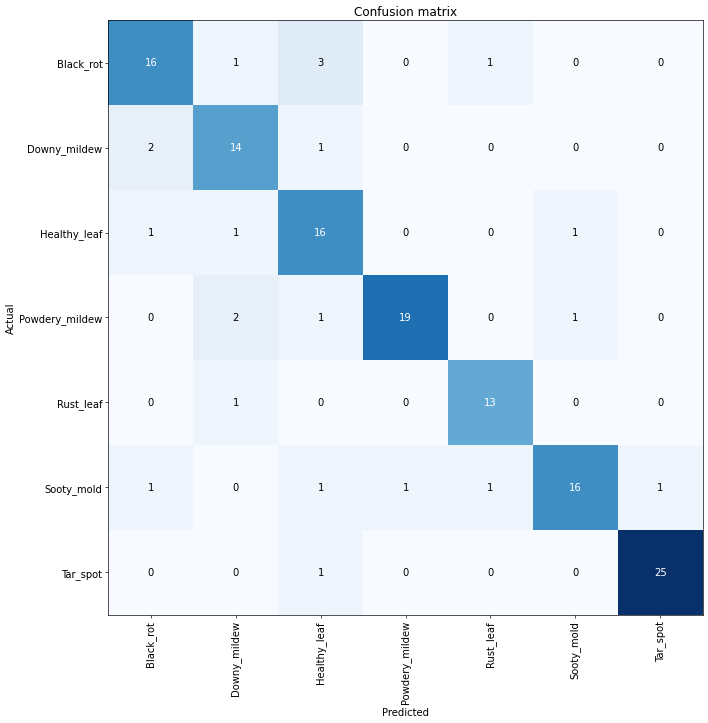

In [29]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [30]:
interp.print_classification_report()

                precision    recall  f1-score   support

     Black_rot       0.80      0.76      0.78        21
  Downy_mildew       0.74      0.82      0.78        17
  Healthy_leaf       0.70      0.84      0.76        19
Powdery_mildew       0.95      0.83      0.88        23
     Rust_leaf       0.87      0.93      0.90        14
    Sooty_mold       0.89      0.76      0.82        21
      Tar_spot       0.96      0.96      0.96        26

      accuracy                           0.84       141
     macro avg       0.84      0.84      0.84       141
  weighted avg       0.85      0.84      0.85       141



In [18]:
interp.most_confused(min_val=5)

[]

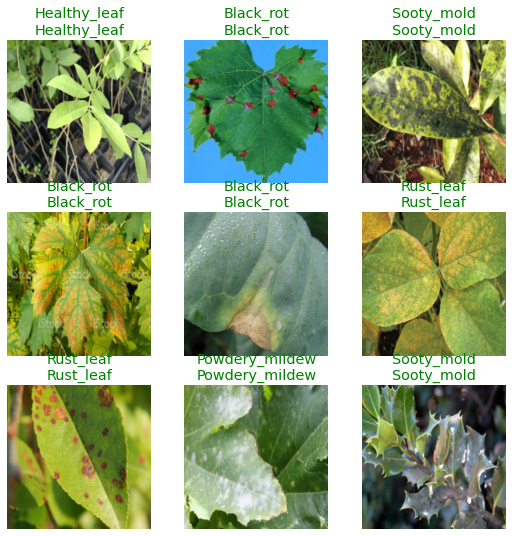

In [32]:
learner.show_results(shuffle=True)

# **SAVE MODEL**

In [35]:
learner.save('/content/gdrive/MyDrive/dataset/models/demo')

Path('/content/gdrive/MyDrive/dataset/models/demo.pth')

# **LOAD TRAINED MODEL**

In [ ]:
#load trained model
learn.load('/content/gdrive/MyDrive/dataset/models/demo');

## **EXPORT MODEL**

In [ ]:
learner.export("dbc_resnet34_fastai.pkl")

/content/gdrive/MyDrive/plant_diseases_classification/models


# **โหลดโมเดลเพื่อทำนายผล**

In [ ]:
!pip install fastbook
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score
  
learn_inf = load_learner('dbc_resnet34_fastai.pkl')

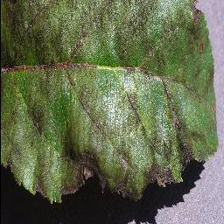

In [ ]:
Image.open("data/test/test/AppleScab3.JPG").resize((224, 224))

In [ ]:
learn_inf.predict("data/test/test/AppleScab3.JPG")

('Apple___Apple_scab',
 TensorBase(0),
 TensorBase([9.5804e-01, 2.1550e-05, 1.8836e-06, 6.6904e-06, 4.9031e-07, 7.5434e-08, 2.1115e-08, 2.3186e-02, 1.8522e-04, 2.2154e-06, 2.3831e-05, 4.9147e-08, 7.7756e-06, 3.0152e-04, 7.6980e-05, 5.8930e-08,
         2.4477e-07, 1.4005e-06, 3.1608e-07, 6.3702e-08, 1.4321e-04, 4.3028e-07, 4.7993e-08, 9.5368e-06, 6.5675e-07, 4.9231e-03, 1.9223e-04, 1.6223e-04, 3.4302e-08, 5.1736e-08, 5.3742e-07, 1.0029e-07,
         4.5847e-07, 2.7132e-09, 3.6704e-06, 3.5610e-09, 9.4946e-09, 1.2711e-02]))